## 大田区の世帯と人口マップ

まず必要なライブラリのインポート

In [16]:
import geopandas as gpd
import contextily as ctx
import plotly.express as px

import matplotlib as mpl

mpl.rc('font',family='Hiragino Maru Gothic Pro')

ファイルの読み込み

In [17]:
gdf = gpd.read_file('大田区')

ファイルの情報

In [18]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8051 entries, 0 to 8050
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   KEY_CODE   8051 non-null   object  
 1   PREF       8051 non-null   object  
 2   CITY       8051 non-null   object  
 3   K_AREA     8051 non-null   object  
 4   S_AREA     8051 non-null   object  
 5   PREF_NAME  8051 non-null   object  
 6   CITY_NAME  8051 non-null   object  
 7   S_NAME     8051 non-null   object  
 8   KIGO_E     0 non-null      float64 
 9   HCODE      8051 non-null   int64   
 10  AREA       8051 non-null   float64 
 11  PERIMETER  8051 non-null   float64 
 12  KIHON1     8051 non-null   object  
 13  DUMMY1     8051 non-null   object  
 14  KIHON2     8051 non-null   object  
 15  KIHON3     8051 non-null   object  
 16  C1         8051 non-null   int64   
 17  C2         8051 non-null   int64   
 18  DUMMY2     8051 non-null   object  
 19  C3         8051 non

動作確認を含め、上から５個を出力

In [19]:
gdf.head()

,KEY_CODE,PREF,CITY,K_AREA,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,...,KEYCODE1,JINKO,SETAI,KEN_OLD,CITY_OLD,X_CODE,Y_CODE,KCODE1,CCODE1,geometry
0,131110001101,13,111,002004010,0001101,東京都,大田区,大森東四丁目,NaN,8101,...,1110001-1-01,44,18,13,111,139.736139,35.568959,0020-04010,1-1- 1,"POLYGON ((139.73710 35.56954, 139.73714 35.569..."
1,131110001102,13,111,002004020,0001102,東京都,大田区,大森東四丁目,NaN,8101,...,1110001-1-02,32,14,13,111,139.737062,35.568623,0020-04020,1-1- 2,"POLYGON ((139.73735 35.56889, 139.73734 35.568..."
2,131110001103,13,111,002004030,0001103,東京都,大田区,大森東四丁目,NaN,8101,...,1110001-1-03,54,27,13,111,139.737748,35.568512,0020-04030,1-1- 3,"POLYGON ((139.73821 35.56877, 139.73811 35.568..."
3,131110001104,13,111,002004170,0001104,東京都,大田区,大森東四丁目,NaN,8101,...,1110001-1-04,19,11,13,111,139.737719,35.568189,0020-04170,1-1- 4,"POLYGON ((139.73811 35.56828, 139.73807 35.568..."
4,131110002101,13,111,002004040,0002101,東京都,大田区,大森東四丁目,NaN,8101,...,1110002-1-01,73,28,13,111,139.737699,35.569268,0020-04040,2-1- 1,"POLYGON ((139.73816 35.56940, 139.73827 35.569..."


ベースマップに必要なライブラリをインポート

In [20]:
import contextily as cx

webメルカトルにするために指定

In [21]:
gdf=gdf.to_crs(3857)

大田区の世帯の地図の出力

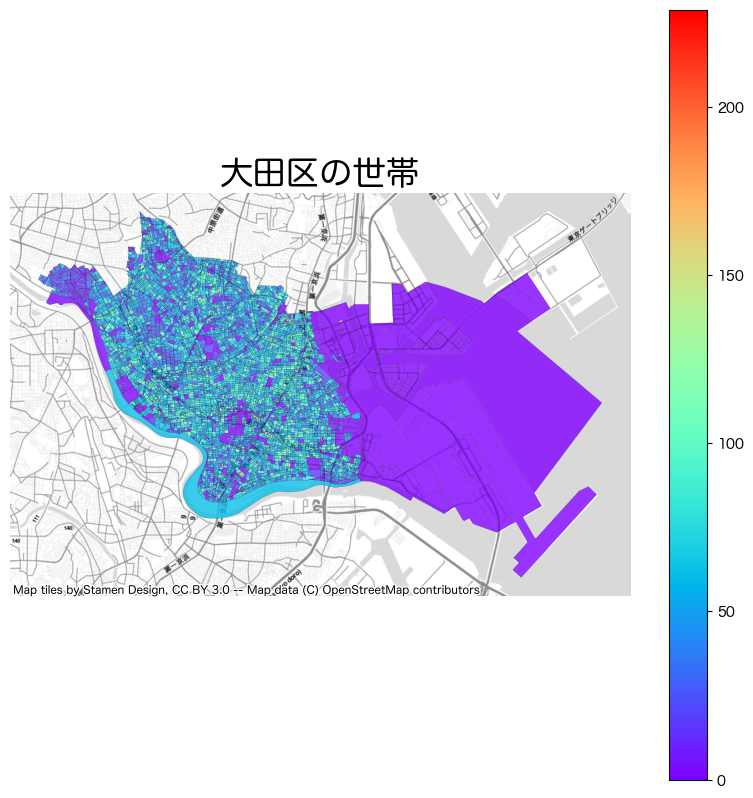

In [22]:
ax = gdf.plot(figsize=(10,10),
         column='SETAI',
         legend=True,
         cmap='rainbow',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8)

ax.axis('off')

ax.set_title('大田区の世帯',fontsize=24);

cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)


大田区の人口の地図の出力

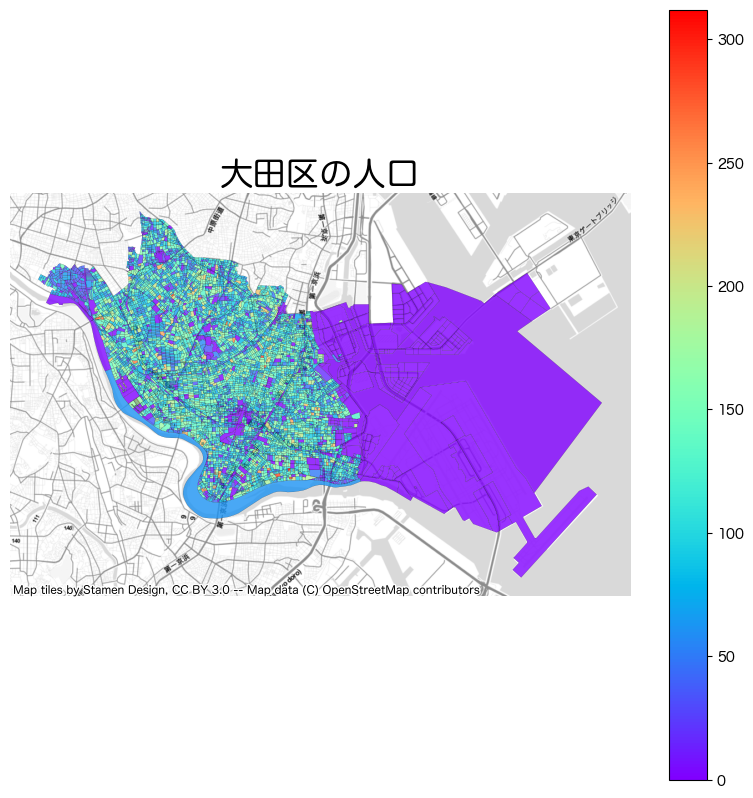

In [23]:
ax = gdf.plot(figsize=(10,10),
         column='JINKO',
         legend=True,
         cmap='rainbow',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8)

ax.axis('off')

ax.set_title('大田区の人口',fontsize=24);

cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

人口の多い順番に並び替え、出力

In [24]:
gdf = gdf.sort_values(by='JINKO', ascending=False )
gdf

,KEY_CODE,PREF,CITY,K_AREA,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,...,KEYCODE1,JINKO,SETAI,KEN_OLD,CITY_OLD,X_CODE,Y_CODE,KCODE1,CCODE1,geometry
5317,1311138541,13,111,040002070,38541,東京都,大田区,本羽田二丁目,NaN,8101,...,1113854-1-00,312,94,13,111,139.730600,35.548025,0400-02070,3854-1,"POLYGON ((15554787.397 4238580.353, 15554697.4..."
6285,1311145221,13,111,048002370,45221,東京都,大田区,南六郷二丁目,NaN,8101,...,1114522-1-00,296,89,13,111,139.719101,35.544102,0480-02370,4522-1,"POLYGON ((15553452.514 4238085.636, 15553452.2..."
6132,1311143971,13,111,047002200,43971,東京都,大田区,東六郷二丁目,NaN,8101,...,1114397-1-00,296,88,13,111,139.715840,35.546519,0470-02200,4397-1,"POLYGON ((15553145.045 4238417.363, 15553138.9..."
5343,1311138791,13,111,040002140,38791,東京都,大田区,本羽田二丁目,NaN,8101,...,1113879-1-00,290,90,13,111,139.730922,35.545964,0400-02140,3879-1,"POLYGON ((15554819.772 4238289.341, 15554815.0..."
4002,1311129181,13,111,033004210,29181,東京都,大田区,東雪谷四丁目,NaN,8101,...,1112918-1-00,289,96,13,111,139.694498,35.592033,0330-04210,2918-1,"POLYGON ((15550772.958 4244636.762, 15550705.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,131111016307,13,111,010001070,1016307,東京都,大田区,昭和島一丁目,NaN,8101,...,1111016-3-07,0,0,13,111,139.747414,35.570617,0100-01070,1016-3- 7,"POLYGON ((15556722.507 4241466.376, 15556604.2..."
1273,131111017301,13,111,010002010,1017301,東京都,大田区,昭和島二丁目,NaN,8101,...,1111017-3-01,0,0,13,111,139.749336,35.574682,0100-02010,1017-3- 1,"POLYGON ((15556988.804 4242315.848, 15556836.3..."
1274,131111017302,13,111,010002020,1017302,東京都,大田区,昭和島二丁目,NaN,8101,...,1111017-3-02,0,0,13,111,139.749367,35.570433,0100-02020,1017-3- 2,"POLYGON ((15556961.641 4242008.171, 15556938.2..."
1275,131111017303,13,111,010002030,1017303,東京都,大田区,昭和島二丁目,NaN,8101,...,1111017-3-03,0,0,13,111,139.751381,35.574028,0100-02030,1017-3- 3,"POLYGON ((15557264.829 4242322.843, 15556961.6..."


TOP10

In [25]:
gdf.head(10)

,KEY_CODE,PREF,CITY,K_AREA,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,...,KEYCODE1,JINKO,SETAI,KEN_OLD,CITY_OLD,X_CODE,Y_CODE,KCODE1,CCODE1,geometry
5317,1311138541,13,111,040002070,38541,東京都,大田区,本羽田二丁目,NaN,8101,...,1113854-1-00,312,94,13,111,139.730600,35.548025,0400-02070,3854-1,"POLYGON ((15554787.397 4238580.353, 15554697.4..."
6285,1311145221,13,111,048002370,45221,東京都,大田区,南六郷二丁目,NaN,8101,...,1114522-1-00,296,89,13,111,139.719101,35.544102,0480-02370,4522-1,"POLYGON ((15553452.514 4238085.636, 15553452.2..."
6132,1311143971,13,111,047002200,43971,東京都,大田区,東六郷二丁目,NaN,8101,...,1114397-1-00,296,88,13,111,139.715840,35.546519,0470-02200,4397-1,"POLYGON ((15553145.045 4238417.363, 15553138.9..."
5343,1311138791,13,111,040002140,38791,東京都,大田区,本羽田二丁目,NaN,8101,...,1113879-1-00,290,90,13,111,139.730922,35.545964,0400-02140,3879-1,"POLYGON ((15554819.772 4238289.341, 15554815.0..."
4002,1311129181,13,111,033004210,29181,東京都,大田区,東雪谷四丁目,NaN,8101,...,1112918-1-00,289,96,13,111,139.694498,35.592033,0330-04210,2918-1,"POLYGON ((15550772.958 4244636.762, 15550705.0..."
429,1311103221,13,111,005001190,03221,東京都,大田区,大森西一丁目,NaN,8101,...,1110322-1-00,284,90,13,111,139.722231,35.576605,0050-01190,322-1,"POLYGON ((15553854.222 4242534.670, 15553868.0..."
5302,1311138441,13,111,040001230,38441,東京都,大田区,本羽田一丁目,NaN,8101,...,1113844-1-00,284,89,13,111,139.727007,35.546604,0400-01230,3844-1,"POLYGON ((15554415.255 4238464.686, 15554435.6..."
5211,1311137681,13,111,039002040,37681,東京都,大田区,萩中二丁目,NaN,8101,...,1113768-1-00,277,90,13,111,139.732611,35.552530,0390-02040,3768-1,"POLYGON ((15554955.488 4239204.818, 15554946.3..."
112,1311100821,13,111,003002090,00821,東京都,大田区,大森南二丁目,NaN,8101,...,1110082-1-00,277,87,13,111,139.744769,35.562364,0030-02090,82-1,"POLYGON ((15556315.045 4240584.525, 15556315.0..."
3643,1311126641,13,111,030002230,26641,東京都,大田区,久が原二丁目,NaN,8101,...,1112664-1-00,274,86,13,111,139.699205,35.580982,0300-02230,2664-1,"POLYGON ((15551196.598 4243138.576, 15551196.6..."


TOP10のグラフ
同じ名前の街がTOP10の中にあるので項目が9個になってます

In [26]:
fig = px.bar(gdf.head(10),
            y='JINKO',
            x='S_NAME',
            template='seaborn' )

fig.show()

人口のTOP10の地図の出力

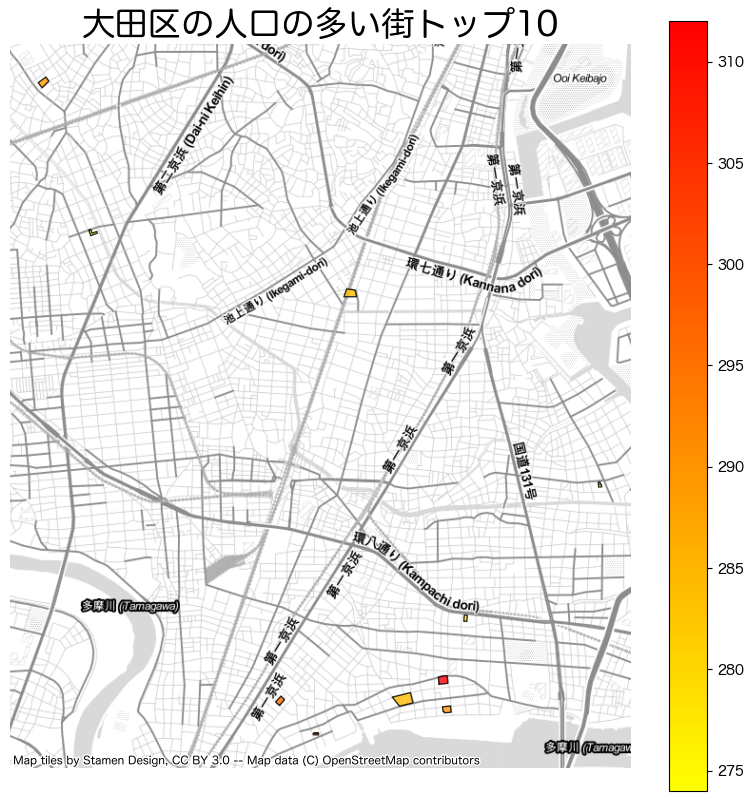

In [27]:
ax = gdf.head(10).plot(figsize=(10,10),
         column='JINKO',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=1,
         alpha=0.8)

ax.axis('off')

ax.set_title('大田区の人口の多い街トップ10',fontsize=24);

cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

大田区の世帯TOP10の地図の出力

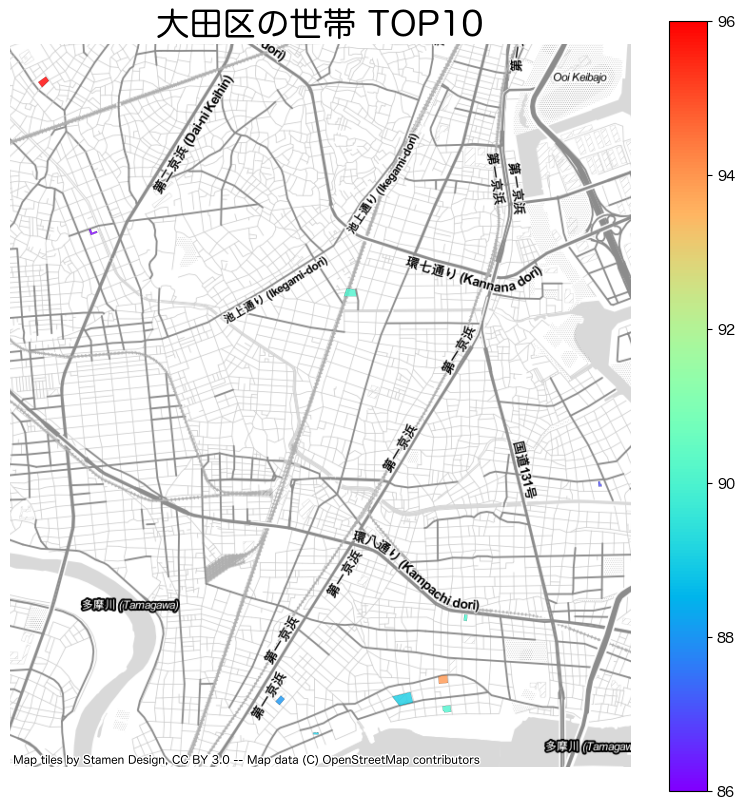

In [28]:
ax = gdf.head(10).plot(figsize=(10,10),
         column='SETAI',
         legend=True,
         cmap='rainbow',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8)

ax.axis('off')

ax.set_title('大田区の世帯 TOP10',fontsize=24);


cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

### 感想
今回のマップはコード自体の使い回しはできませんが、今後色々なプレゼンや資料を作る中で便利な技術が詰まっていて今までよりもどういう使い方をするかイメージしやすくなりました！それと同時に地図から読み取れる内容もとても多くて楽しかった！僕が調べた大田区は半分くらいほとんどずん出る人がいなくて調べてみたらほとんどが企業や企業の社員寮などで、普通の住宅はほとんどなく、一部に海もあってそもそも人がいない場所もありました。